In [8]:
import numpy as np
from scipy.spatial.distance import squareform
import networkx as nx
import planarity

In [9]:


def sort_graph_edges(G):
    sorted_edges = []
    for source, dest, data in sorted(G.edges(data=True),
                                     key=lambda x: x[2]['weight']):
        sorted_edges.append({'source': source,
                             'dest': dest,
                             'weight': data['weight']})
        
    return sorted_edges
def compute_PMFG(sorted_edges, nb_nodes):
    PMFG = nx.Graph()
    for edge in sorted_edges:
        PMFG.add_edge(edge['source'], edge['dest'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
            
        if len(PMFG.edges()) == 3*(nb_nodes-2):
            break
    
    return PMFG

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [10]:
nb_nodes = 150

distances = squareform(np.random.uniform(
    size=int(nb_nodes * (nb_nodes - 1) / 2)))
distances[np.diag_indices(nb_nodes)] = np.ones(nb_nodes)

complete_graph = nx.Graph()
for i in range(nb_nodes):
    for j in range(i+1, nb_nodes):
        complete_graph.add_edge(i, j, weight=distances[i,j])

sorted_edges = sort_graph_edges(complete_graph)

PMFG = compute_PMFG(sorted_edges, len(complete_graph.nodes))

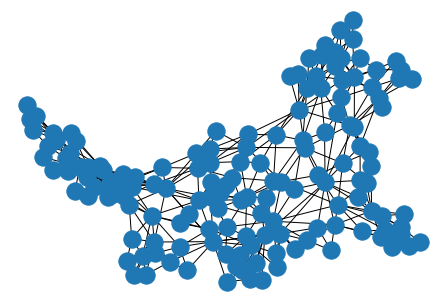

In [11]:
nx.draw_spring(PMFG)